# Cross-sectional analysis

- what was the situation in 2013 vs 2023? (air quality, fleet share, per country)

In [88]:
# SET FIGURE PATH
# change figpath to figures/analysis_cross_section´
figpath = "../figures/analysis"
os.makedirs(figpath, exist_ok=True)

In [6]:
import pandas as pd

# Load processed data
aq = pd.read_csv("../data/processed/AQ_annual_averages.csv")
vehicle = pd.read_csv("../data/processed/combined_vehicle_data.csv")

# Filter for 2013 and 2023
years = [2013, 2023]
aq_13_23 = aq[aq['Year'].isin(years)]
vehicle_13_23 = vehicle[vehicle['Year'].isin(years)]

# Merge on Country and Year
merged = aq_13_23.merge(vehicle_13_23, on=['Country', 'Year'], how='left')

# Show summary: mean and std for each pollutant and year, per country
summary = (
    merged.groupby(['Country', 'Pollutant', 'Year'])
    .agg(
        AQ_Mean=('AnnualAvg_fullweek_Daytime', 'mean'),
        AQ_Std=('AnnualAvg_fullweek_Daytime', 'std'),
        AF_Fleet=('AF_fleet', 'mean'),
        BEV_Fleet=('BEV_fleet', 'mean')
    )
    .reset_index()
)

print(summary)

# Optional: Pivot for easier comparison
pivot = summary.pivot(index=['Country', 'Pollutant'], columns='Year', values=['AQ_Mean', 'AF_Fleet', 'BEV_Fleet'])
pivot

   Country   Pollutant  Year    AQ_Mean  AQ_Std  AF_Fleet  BEV_Fleet
0       AT         CO2  2013  58.166490     NaN      0.13       0.04
1       AT         CO2  2023  67.757104     NaN      4.23       3.00
2       AT          NO  2013  20.149209     NaN      0.13       0.04
3       AT          NO  2023  13.839310     NaN      4.23       3.00
4       AT         NO2  2013  26.101747     NaN      0.13       0.04
5       AT         NO2  2023  16.279895     NaN      4.23       3.00
6       AT  NOX as NO2  2013  10.692693     NaN      0.13       0.04
7       AT  NOX as NO2  2023   8.111752     NaN      4.23       3.00
8       AT        PM10  2013   4.286946     NaN      0.13       0.04
9       AT        PM10  2023   2.078151     NaN      4.23       3.00
10      CH         CO2  2023  59.021179     NaN      5.62       3.33
11      CH         NO2  2023  20.796202     NaN      5.62       3.33
12      CH        PM10  2023   8.188244     NaN      5.62       3.33
13      CH       PM2.5  2023  35.4

AQ_Mean            AF_Fleet        BEV_Fleet       
Year                     2013       2023     2013   2023      2013   2023
Country Pollutant                                                        
AT      CO2         58.166490  67.757104     0.13   4.23      0.04   3.00
        NO          20.149209  13.839310     0.13   4.23      0.04   3.00
        NO2         26.101747  16.279895     0.13   4.23      0.04   3.00
        NOX as NO2  10.692693   8.111752     0.13   4.23      0.04   3.00
        PM10         4.286946   2.078151     0.13   4.23      0.04   3.00
CH      CO2               NaN  59.021179      NaN   5.62       NaN   3.33
        NO2               NaN  20.796202      NaN   5.62       NaN   3.33
        PM10              NaN   8.188244      NaN   5.62       NaN   3.33
        PM2.5             NaN  35.476834      NaN   5.62       NaN   3.33
DK      CO2               NaN  60.690282      NaN  11.31       NaN   7.00
        NO                NaN  21.243517      NaN  11.31       NaN   7.00
        NO2               NaN  15.742592      NaN  11.31       NaN   7.00
        NOX as NO2        NaN   6.674195      NaN  11.31       NaN   7.00
        PM10         3.429345  11.749182     0.06  11.31      0.06   7.00
        PM2.5             NaN  38.988626      NaN  11.31       NaN   7.00
NL      CO2         45.950985  58.033092     2.99   9.10      0.05   4.95
        NO          21.014644  15.729163     2.99   9.10      0.05   4.95
        NO2               NaN  19.396713      NaN   9.10       NaN   4.95
        NOX as NO2  11.353653   7.582390     2.99   9.10      0.05   4.95
        PM10              NaN   6.295661      NaN   9.10       NaN   4.95
        PM2.5             NaN  30.281988      NaN   9.10       NaN   4.95
NO      CO2         42.594027  50.795713     0.66  28.11      0.62  22.01
        NO          18.495385  12.889793     0.66  28.11      0.62  22.01
        NO2         34.847818  21.485718     0.66  28.11      0.62  22.01
        NOX as NO2   9.577014   5.953912     0.66  28.11      0.62  22.01
        PM10        14.931768   9.322129     0.66  28.11      0.62  22.01
        PM2.5       66.236711  38.299727     0.66  28.11      0.62  22.01

Saved: ../figures\CO2_first_vs_last_year_by_country.png


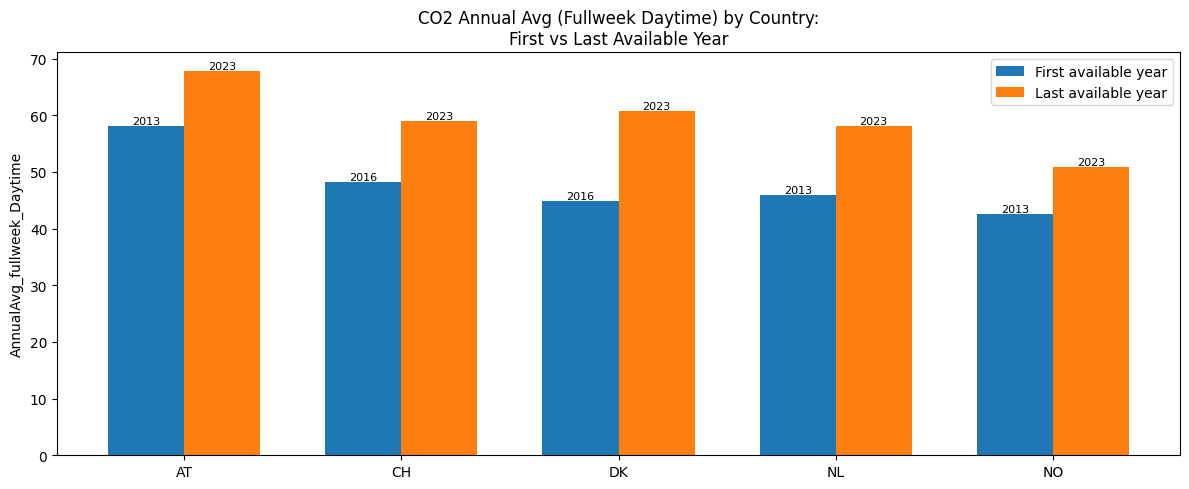

Saved: ../figures\NO2_first_vs_last_year_by_country.png


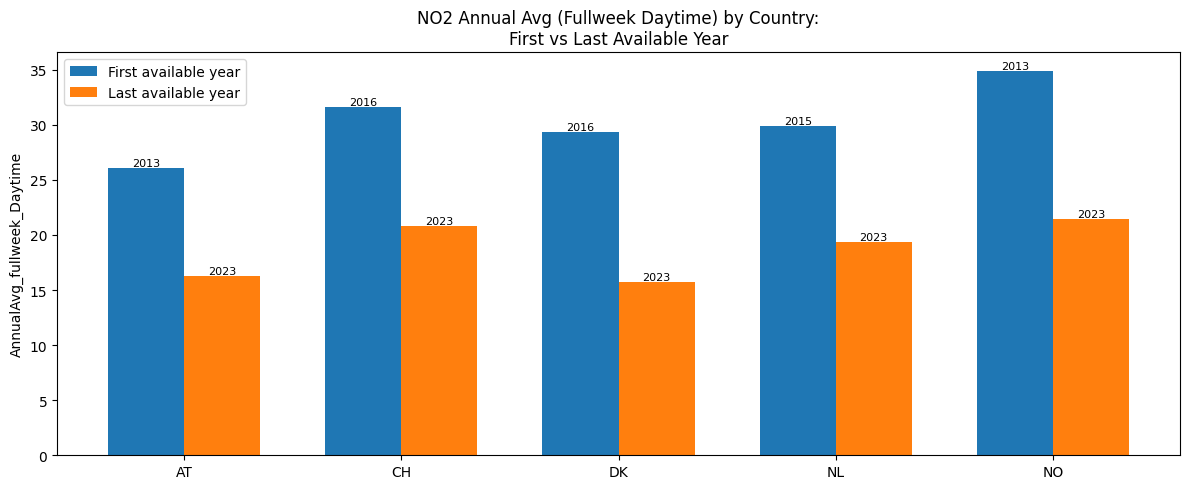

Saved: ../figures\PM2.5_first_vs_last_year_by_country.png


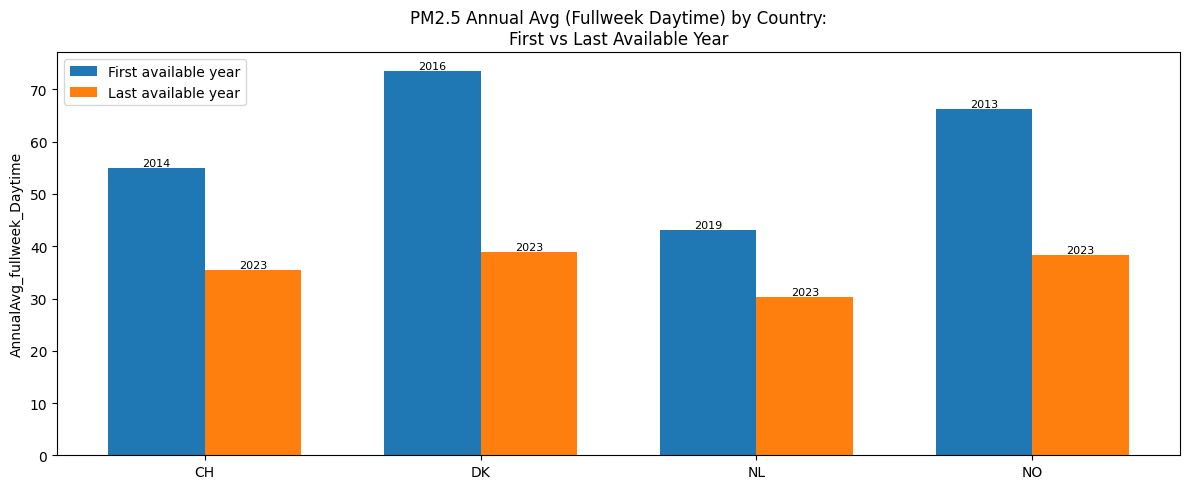

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import os

# Load data
aq = pd.read_csv("../data/processed/AQ_annual_averages.csv")

# Pollutants to plot
pollutants_to_plot = ["CO2", "NO2", "PM2.5"]

# Ensure figures directory exists
figures_dir = "../figures"
os.makedirs(figures_dir, exist_ok=True)

# Find first and last available year per country and pollutant
first_last = (
    aq[aq['Pollutant'].isin(pollutants_to_plot)]
    .groupby(['Country', 'Pollutant'])['Year']
    .agg(['min', 'max'])
    .reset_index()
)

# Prepare data for plotting
for pollutant in pollutants_to_plot:
    plt.figure(figsize=(12, 5))
    sub = first_last[first_last['Pollutant'] == pollutant]
    countries = sub['Country'].unique()
    x = range(len(countries))
    width = 0.35

    vals_first = []
    vals_last = []
    years_first = []
    years_last = []
    for _, row in sub.iterrows():
        y_first = aq[(aq['Country'] == row['Country']) & (aq['Pollutant'] == pollutant) & (aq['Year'] == row['min'])]['AnnualAvg_fullweek_Daytime']
        y_last = aq[(aq['Country'] == row['Country']) & (aq['Pollutant'] == pollutant) & (aq['Year'] == row['max'])]['AnnualAvg_fullweek_Daytime']
        vals_first.append(y_first.values[0] if not y_first.empty else None)
        vals_last.append(y_last.values[0] if not y_last.empty else None)
        years_first.append(row['min'])
        years_last.append(row['max'])

    plt.bar([i - width/2 for i in x], vals_first, width, label='First available year')
    plt.bar([i + width/2 for i in x], vals_last, width, label='Last available year')

    # Annotate bars with years
    for i, (y, year) in enumerate(zip(vals_first, years_first)):
        if pd.notnull(y):
            plt.text(i - width/2, y, str(year), ha='center', va='bottom', fontsize=8, rotation=0)
    for i, (y, year) in enumerate(zip(vals_last, years_last)):
        if pd.notnull(y):
            plt.text(i + width/2, y, str(year), ha='center', va='bottom', fontsize=8, rotation=0)

    plt.xticks(x, countries)
    plt.ylabel('AnnualAvg_fullweek_Daytime')
    plt.title(f'{pollutant} Annual Avg (Fullweek Daytime) by Country:\nFirst vs Last Available Year')
    plt.legend()
    plt.tight_layout()

    # Save figure if not already present
    fig_path = os.path.join(figures_dir, f"{pollutant}_first_vs_last_year_by_country.png")
    if not os.path.exists(fig_path):
        plt.savefig(fig_path)
        print(f"Saved: {fig_path}")
    else:
        print(f"Figure already exists: {fig_path}")
    plt.show()

# Regression models

In [89]:
# SET FIGURE PATH
# change figpath to figures/analysis´
figpath = "../figures/analysis"
os.makedirs(figpath, exist_ok=True)


OLS summary for NO - CO2:
                                OLS Regression Results                                
Dep. Variable:     AnnualAvg_fullweek_Daytime   R-squared:                       0.461
Model:                                    OLS   Adj. R-squared:                  0.401
Method:                         Least Squares   F-statistic:                     7.690
Date:                        Sat, 17 May 2025   Prob (F-statistic):             0.0216
Time:                                12:43:51   Log-Likelihood:                -29.031
No. Observations:                          11   AIC:                             62.06
Df Residuals:                               9   BIC:                             62.86
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------

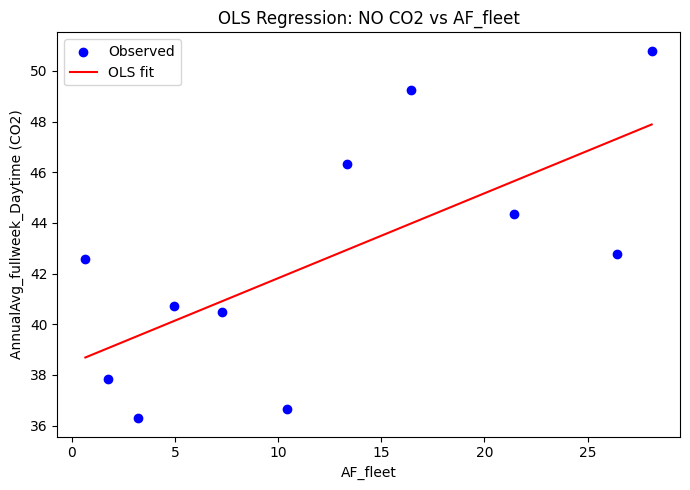


OLS summary for NO - NO:
                                OLS Regression Results                                
Dep. Variable:     AnnualAvg_fullweek_Daytime   R-squared:                       0.552
Model:                                    OLS   Adj. R-squared:                  0.503
Method:                         Least Squares   F-statistic:                     11.10
Date:                        Sat, 17 May 2025   Prob (F-statistic):            0.00877
Time:                                12:43:52   Log-Likelihood:                -15.928
No. Observations:                          11   AIC:                             35.86
Df Residuals:                               9   BIC:                             36.65
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

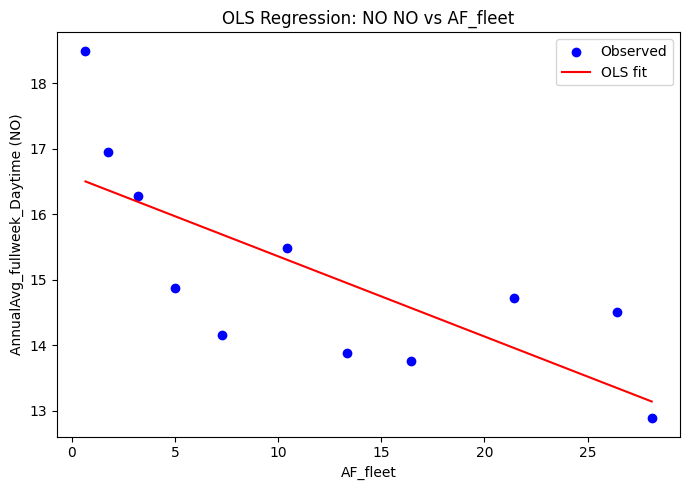


OLS summary for NO - NO2:
                                OLS Regression Results                                
Dep. Variable:     AnnualAvg_fullweek_Daytime   R-squared:                       0.889
Model:                                    OLS   Adj. R-squared:                  0.877
Method:                         Least Squares   F-statistic:                     72.21
Date:                        Sat, 17 May 2025   Prob (F-statistic):           1.36e-05
Time:                                12:43:52   Log-Likelihood:                -20.885
No. Observations:                          11   AIC:                             45.77
Df Residuals:                               9   BIC:                             46.57
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------

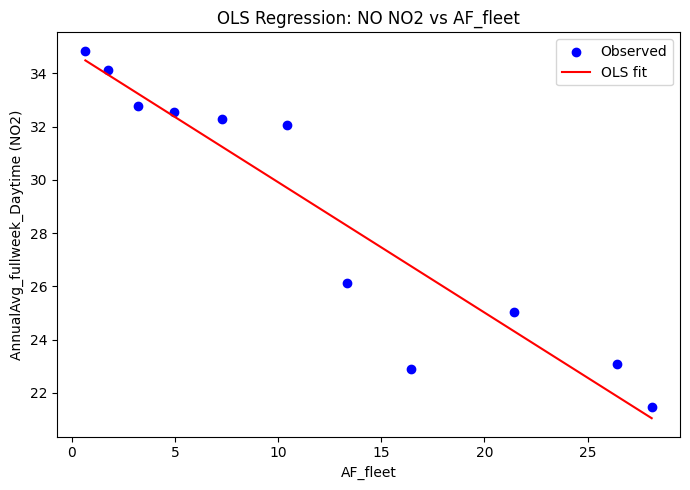


OLS summary for NO - NOX as NO2:
                                OLS Regression Results                                
Dep. Variable:     AnnualAvg_fullweek_Daytime   R-squared:                       0.572
Model:                                    OLS   Adj. R-squared:                  0.525
Method:                         Least Squares   F-statistic:                     12.03
Date:                        Sat, 17 May 2025   Prob (F-statistic):            0.00706
Time:                                12:43:52   Log-Likelihood:                -12.222
No. Observations:                          11   AIC:                             28.44
Df Residuals:                               9   BIC:                             29.24
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------

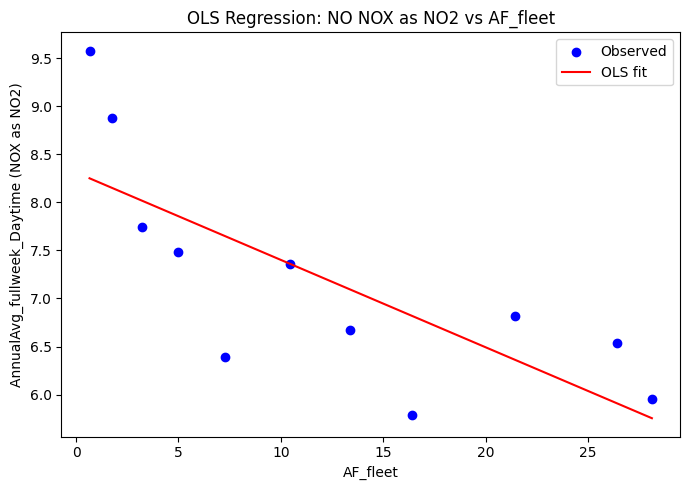


OLS summary for NO - PM10:
                                OLS Regression Results                                
Dep. Variable:     AnnualAvg_fullweek_Daytime   R-squared:                       0.843
Model:                                    OLS   Adj. R-squared:                  0.826
Method:                         Least Squares   F-statistic:                     48.32
Date:                        Sat, 17 May 2025   Prob (F-statistic):           6.67e-05
Time:                                12:43:53   Log-Likelihood:                -13.164
No. Observations:                          11   AIC:                             30.33
Df Residuals:                               9   BIC:                             31.12
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

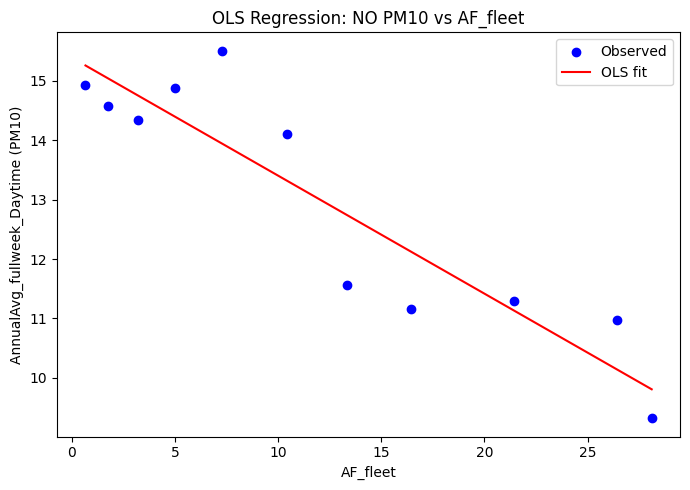


OLS summary for NO - PM2.5:
                                OLS Regression Results                                
Dep. Variable:     AnnualAvg_fullweek_Daytime   R-squared:                       0.912
Model:                                    OLS   Adj. R-squared:                  0.902
Method:                         Least Squares   F-statistic:                     92.77
Date:                        Sat, 17 May 2025   Prob (F-statistic):           4.89e-06
Time:                                12:43:53   Log-Likelihood:                -27.209
No. Observations:                          11   AIC:                             58.42
Df Residuals:                               9   BIC:                             59.21
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------

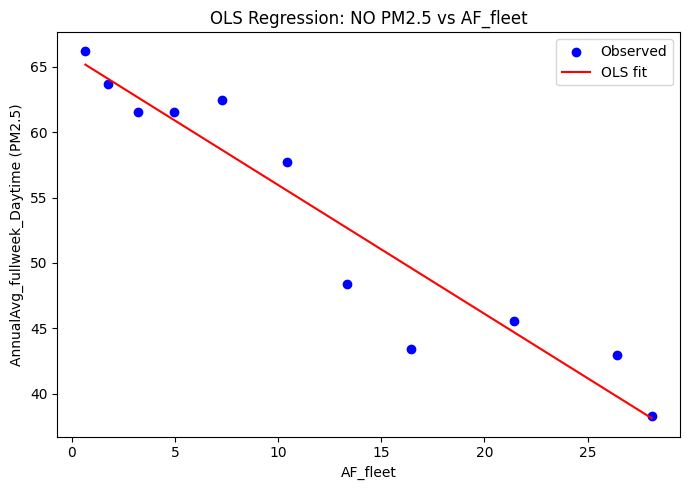

In [10]:
# OLS for all pollutants in Norway: AF_fleet as X, annual average as Y
import statsmodels.api as sm
import matplotlib.pyplot as plt

country = "NO"
pollutants = data[data["Country"] == country]["Pollutant"].unique()

for pollutant in pollutants:
    df = data[(data["Country"] == country) & (data["Pollutant"] == pollutant)].copy()
    annual_avg_cols = [col for col in df.columns if "AnnualAvg" in col]
    if not annual_avg_cols or "AF_fleet" not in df.columns:
        print(f"Skipping {pollutant}: missing columns.")
        continue
    target_col = annual_avg_cols[0]
    df = df.sort_values("AF_fleet")
    X = df["AF_fleet"].astype(float)
    y = df[target_col].astype(float)
    mask = y.notnull() & X.notnull()
    X = X[mask]
    y = y[mask]
    X_ols = sm.add_constant(X)
    model = sm.OLS(y, X_ols).fit()
    print(f"\nOLS summary for {country} - {pollutant}:")
    print(model.summary())
    plt.figure(figsize=(7,5))
    plt.scatter(X, y, label="Observed", color="blue")
    plt.plot(X, model.predict(X_ols), color="red", label="OLS fit")
    plt.xlabel("AF_fleet")
    plt.ylabel(f"{target_col} ({pollutant})")
    plt.title(f"OLS Regression: {country} {pollutant} vs AF_fleet")
    plt.legend()
    plt.tight_layout()
    plt.show()

In [ ]:
# OLS for all pollutants, all countries: AF_fleet as X, annual average as Y
import statsmodels.api as sm
import matplotlib.pyplot as plt

pollutants = data["Pollutant"].unique()

for pollutant in pollutants:
    df = data[data["Pollutant"] == pollutant].copy()
    annual_avg_cols = [col for col in df.columns if "AnnualAvg" in col]
    if not annual_avg_cols or "AF_fleet" not in df.columns:
        print(f"Skipping {pollutant}: missing columns.")
        continue
    target_col = annual_avg_cols[0]
    df = df.sort_values("AF_fleet")
    X = df["AF_fleet"].astype(float)
    y = df[target_col].astype(float)
    mask = y.notnull() & X.notnull()
    X = X[mask]
    y = y[mask]
    X_ols = sm.add_constant(X)
    model = sm.OLS(y, X_ols).fit()
    print(f"\nOLS summary for ALL COUNTRIES - {pollutant}:")
    print(model.summary())
    plt.figure(figsize=(7,5))
    plt.scatter(X, y, label="Observed", color="blue")
    plt.plot(X, model.predict(X_ols), color="red", label="OLS fit")
    plt.xlabel("AF_fleet")
    plt.ylabel(f"{target_col} ({pollutant})")
    plt.title(f"OLS Regression: ALL COUNTRIES {pollutant} vs AF_fleet")
    plt.legend()
    plt.tight_layout()
    plt.show()

In [59]:
# Load and prepare data
data = pd.read_csv("../data/processed/AQ_annual_averages.csv")
vehicle = pd.read_csv("../data/processed/combined_vehicle_data.csv")
data = data.merge(vehicle, on=['Country', 'Year'], how='left')

In [ ]:
data['Pollutant'].unique()

array(['CO2', 'NO', 'NO2', 'NOX as NO2', 'PM10', 'PM2.5'], dtype=object)

In [97]:
# Add pollutant of interest for one-pollutant analysis 
pollutant = "PM2.5"

In [ ]:
# Add pollutants of interest in multi-pollutant model (to run in models)
pollutants_of_interest = ["CO2", "NO2", "PM2.5", "PM10"]

In [22]:
data.head(2)

,Country,Pollutant,Year,AnnualAvg_fullweek_Daytime,AnnualAvg_fullweek_RushHour,AnnualAvg_weekday_Daytime,AnnualAvg_weekday_RushHour,AnnualAvg_weekend_Daytime,AnnualAvg_weekend_RushHour,BEV_fleet,AF_fleet,BEV_newreg,AF_newreg,BEV_mktshare,AF_mktshare
0,AT,CO2,2013,58.17,54.65,56.73,52.91,61.81,59.04,0.04,0.13,656,1364.00,0.21,0.44
1,AT,CO2,2014,55.77,51.79,54.37,50.36,59.27,55.40,0.07,0.18,1344,2347.00,0.44,0.77


Saved: ../figures/analysis\PM2.5_regression_country_fixed_effects_model_colored.png


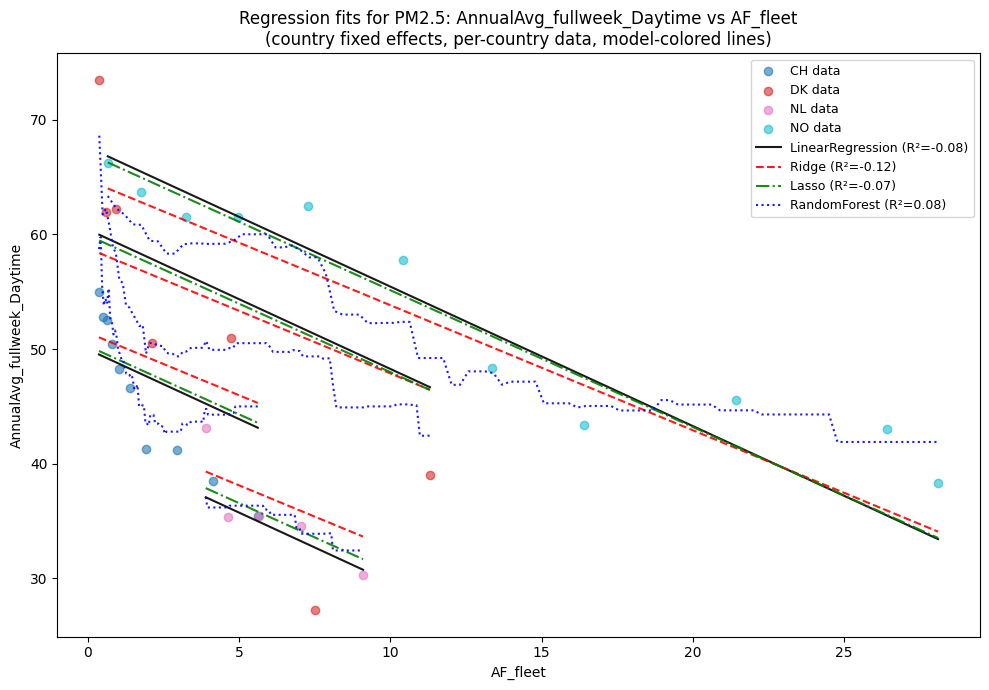

In [98]:
# --- Visual comparison of regression variants for a single pollutant, with R^2 in legend and country fixed effects (per-country lines, model lines colored by model) ---

import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import numpy as np

# Choose a pollutant and target
pollutant = pollutant
target = "AnnualAvg_fullweek_Daytime"
feature = "AF_fleet"

df = data[data['Pollutant'] == pollutant].copy()
if df.shape[0] < 6 or feature not in df.columns or target not in df.columns:
    print(f"Not enough data for {pollutant} or missing columns.")
else:
    # Save original country column for labeling
    df['_CountryOrig'] = df['Country']
    # Add country fixed effects (one-hot encoding, drop first to avoid collinearity)
    df = pd.get_dummies(df, columns=['Country'], drop_first=True)
    country_cols = [col for col in df.columns if col.startswith('Country_')]
    X_df = df[[feature] + country_cols]
    y = df[target]
    mask = (~X_df.isnull().any(axis=1)) & (~y.isnull())
    X = X_df[mask].values
    y = y[mask].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    models = {
        "LinearRegression": LinearRegression(),
        "Ridge": Ridge(alpha=1.0),
        "Lasso": Lasso(alpha=0.1),
        "RandomForest": RandomForestRegressor(n_estimators=100, random_state=42)
    }
    model_colors = {
        "LinearRegression": "black",
        "Ridge": "red",
        "Lasso": "green",
        "RandomForest": "blue"
    }
    model_linestyles = {
        "LinearRegression": "-",
        "Ridge": "--",
        "Lasso": "-.",
        "RandomForest": ":"
    }

    # Scatter actual data, colored by country
    plt.figure(figsize=(10, 7))
    country_dummy_cols = [col for col in df.columns if col.startswith('Country_')]
    country_labels = []
    for idx, row in df[mask].iterrows():
        found = False
        for col in country_dummy_cols:
            if row[col] == 1:
                country_labels.append(col.replace('Country_', ''))
                found = True
                break
        if not found:
            country_labels.append(row['_CountryOrig'])
    unique_countries = sorted(set(country_labels))
    country_colors = plt.cm.tab10(np.linspace(0, 1, len(unique_countries)))
    for i, country in enumerate(unique_countries):
        idxs = [j for j, c in enumerate(country_labels) if c == country]
        plt.scatter(X[idxs, 0], y[idxs], color=country_colors[i], alpha=0.6, label=f"{country} data", marker='o')

    # Plot regression lines for each country and model (model lines colored by model)
    for i, country in enumerate(unique_countries):
        idxs = [j for j, c in enumerate(country_labels) if c == country]
        x_country = X[idxs, 0]
        if len(x_country) < 3:
            continue
        x_range = np.linspace(x_country.min(), x_country.max(), 100)
        X_plot = np.zeros((100, X.shape[1]))
        X_plot[:, 0] = x_range
        # Set country dummies
        if country_dummy_cols:
            X_plot[:, 1:] = 0
            if country in [col.replace('Country_', '') for col in country_dummy_cols]:
                idx_col = [col.replace('Country_', '') for col in country_dummy_cols].index(country)
                X_plot[:, idx_col+1] = 1  # +1 because first column is feature
        for j, (name, model) in enumerate(models.items()):
            model.fit(X_train, y_train)
            y_pred_line = model.predict(X_plot)
            r2 = model.score(X_test, y_test)
            # Only label the first country for each model to avoid legend clutter
            label = f"{name} (R²={r2:.2f})" if i == 0 else None
            plt.plot(
                x_range, y_pred_line,
                color=model_colors[name],
                linestyle=model_linestyles[name],
                alpha=0.9,
                label=label
            )

    plt.xlabel(feature)
    plt.ylabel(target)
    plt.title(f"Regression fits for {pollutant}: {target} vs {feature}\n(country fixed effects, per-country data, model-colored lines)")
    handles, labels = plt.gca().get_legend_handles_labels()

    # Save figure to figures folder
    fig_path = os.path.join(figures_dir, f"{pollutant}_regression_country_fixed_effects_model_colored.png")
    if not os.path.exists(fig_path):
        plt.savefig(fig_path)
        print(f"Saved: {fig_path}")
    else:
        print(f"Figure already exists: {fig_path}")

    # Remove duplicate labels
    from collections import OrderedDict
    by_label = OrderedDict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(), loc='best', fontsize=9)
    plt.tight_layout()
    plt.show()

In [85]:
data['Pollutant'].unique()
pollutants_of_interest = ["CO2", "NO2", "PM2.5", "PM10"]

In [100]:
# --- Run regression fits for all pollutants and all AnnualAvg_* columns vs AF_fleet, with country fixed effects and model-colored lines, and print R^2 per model ---

import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import numpy as np
import os

# Ensure figures directory exists
figures_dir = "../figures/analysis"
os.makedirs(figures_dir, exist_ok=True)

# Get all pollutants and all AnnualAvg_* columns
all_pollutants = pollutants_of_interest
annualavg_cols = [col for col in data.columns if col.startswith("AnnualAvg_")]
feature = "AF_fleet"

for pollutant in all_pollutants:
    for target in annualavg_cols:
        df = data[data['Pollutant'] == pollutant].copy()
        if df.shape[0] < 6 or feature not in df.columns or target not in df.columns:
            print(f"Skipping {pollutant} - {target}: not enough data or missing columns.")
            continue
        df['_CountryOrig'] = df['Country']
        df = pd.get_dummies(df, columns=['Country'], drop_first=True)
        country_cols = [col for col in df.columns if col.startswith('Country_')]
        X_df = df[[feature] + country_cols]
        y = df[target]
        mask = (~X_df.isnull().any(axis=1)) & (~y.isnull())
        X = X_df[mask].values
        y = y[mask].values
        if len(y) < 6:
            print(f"Skipping {pollutant} - {target}: not enough valid rows after filtering.")
            continue
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        models = {
            "LinearRegression": LinearRegression(),
            "Ridge": Ridge(alpha=1.0),
            "Lasso": Lasso(alpha=0.1),
            "RandomForest": RandomForestRegressor(n_estimators=100, random_state=42)
        }
        model_colors = {
            "LinearRegression": "black",
            "Ridge": "red",
            "Lasso": "green",
            "RandomForest": "blue"
        }
        model_linestyles = {
            "LinearRegression": "-",
            "Ridge": "--",
            "Lasso": "-.",
            "RandomForest": ":"
        }

        print(f"\nPollutant: {pollutant} | Target: {target}")
        r2_dict = {}
        for name, model in models.items():
            model.fit(X_train, y_train)
            r2 = model.score(X_test, y_test)
            r2_dict[name] = r2
            print(f"  {name} R²: {r2:.3f}")

        plt.figure(figsize=(10, 7))
        country_dummy_cols = [col for col in df.columns if col.startswith('Country_')]
        country_labels = []
        for idx, row in df[mask].iterrows():
            found = False
            for col in country_dummy_cols:
                if row[col] == 1:
                    country_labels.append(col.replace('Country_', ''))
                    found = True
                    break
            if not found:
                country_labels.append(row['_CountryOrig'])
        unique_countries = sorted(set(country_labels))
        country_colors = plt.cm.tab10(np.linspace(0, 1, len(unique_countries)))
        for i, country in enumerate(unique_countries):
            idxs = [j for j, c in enumerate(country_labels) if c == country]
            plt.scatter(X[idxs, 0], y[idxs], color=country_colors[i], alpha=0.6, label=f"{country} data", marker='o')

        for i, country in enumerate(unique_countries):
            idxs = [j for j, c in enumerate(country_labels) if c == country]
            x_country = X[idxs, 0]
            if len(x_country) < 3:
                continue
            x_range = np.linspace(x_country.min(), x_country.max(), 100)
            X_plot = np.zeros((100, X.shape[1]))
            X_plot[:, 0] = x_range
            if country_dummy_cols:
                X_plot[:, 1:] = 0
                if country in [col.replace('Country_', '') for col in country_dummy_cols]:
                    idx_col = [col.replace('Country_', '') for col in country_dummy_cols].index(country)
                    X_plot[:, idx_col+1] = 1
            for j, (name, model) in enumerate(models.items()):
                # Model already fitted above
                y_pred_line = model.predict(X_plot)
                r2 = r2_dict[name]
                label = f"{name} (R²={r2:.2f})" if i == 0 else None
                plt.plot(
                    x_range, y_pred_line,
                    color=model_colors[name],
                    linestyle=model_linestyles[name],
                    alpha=0.9,
                    label=label
                )

        plt.xlabel(feature)
        plt.ylabel(target)
        plt.title(f"Regression fits for {pollutant}: {target} vs {feature}\n(country fixed effects, per-country data, model-colored lines)")
        handles, labels = plt.gca().get_legend_handles_labels()
        from collections import OrderedDict
        by_label = OrderedDict(zip(labels, handles))
        plt.legend(by_label.values(), by_label.keys(), loc='best', fontsize=9)
        plt.tight_layout()
        fig_path = os.path.join(figures_dir, f"{pollutant}_{target}_regression_country_fixed_effects_model_colored.png")
        plt.savefig(fig_path)
        print(f"Saved: {fig_path}")
        plt.close()


Pollutant: CO2 | Target: AnnualAvg_fullweek_Daytime
  LinearRegression R²: 0.661
  Ridge R²: 0.644
  Lasso R²: 0.668
  RandomForest R²: 0.788
Saved: ../figures/analysis\CO2_AnnualAvg_fullweek_Daytime_regression_country_fixed_effects_model_colored.png

Pollutant: CO2 | Target: AnnualAvg_fullweek_RushHour
  LinearRegression R²: 0.634
  Ridge R²: 0.624
  Lasso R²: 0.641
  RandomForest R²: 0.732
Saved: ../figures/analysis\CO2_AnnualAvg_fullweek_RushHour_regression_country_fixed_effects_model_colored.png

Pollutant: CO2 | Target: AnnualAvg_weekday_Daytime
  LinearRegression R²: 0.675
  Ridge R²: 0.635
  Lasso R²: 0.675
  RandomForest R²: 0.802
Saved: ../figures/analysis\CO2_AnnualAvg_weekday_Daytime_regression_country_fixed_effects_model_colored.png

Pollutant: CO2 | Target: AnnualAvg_weekday_RushHour
  LinearRegression R²: 0.654
  Ridge R²: 0.613
  Lasso R²: 0.651
  RandomForest R²: 0.753
Saved: ../figures/analysis\CO2_AnnualAvg_weekday_RushHour_regression_country_fixed_effects_model_colo

In [102]:
# --- Table of best performing model/pollutant/AnnualAvg_ combinations across pollutants_of_interest ---

import pandas as pd

# Store results for each run
results = []

for pollutant in pollutants_of_interest:
    for target in [col for col in data.columns if col.startswith("AnnualAvg_")]:
        df = data[data['Pollutant'] == pollutant].copy()
        if df.shape[0] < 6 or "AF_fleet" not in df.columns or target not in df.columns:
            continue
        df['_CountryOrig'] = df['Country']
        df = pd.get_dummies(df, columns=['Country'], drop_first=True)
        country_cols = [col for col in df.columns if col.startswith('Country_')]
        X_df = df[["AF_fleet"] + country_cols]
        y = df[target]
        mask = (~X_df.isnull().any(axis=1)) & (~y.isnull())
        X = X_df[mask].values
        y = y[mask].values
        if len(y) < 6:
            continue
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        models = {
            "LinearRegression": LinearRegression(),
            "Ridge": Ridge(alpha=1.0),
            "Lasso": Lasso(alpha=0.1),
            "RandomForest": RandomForestRegressor(n_estimators=100, random_state=42)
        }

        for name, model in models.items():
            model.fit(X_train, y_train)
            r2 = model.score(X_test, y_test)
            results.append({
                "Pollutant": pollutant,
                "Target": target,
                "Model": name,
                "R2": r2
            })

# Convert to DataFrame
results_df = pd.DataFrame(results)

# Find the best model for each pollutant/target combination
best_results = results_df.loc[results_df.groupby(['Pollutant', 'Target'])['R2'].idxmax()].reset_index(drop=True)

# Sort by R2 descending for easy viewing
best_results = best_results.sort_values(by="R2", ascending=False)

# Optionally, save to CSV
best_results.to_csv("../results/best_model_per_pollutant_target.csv", index=False)
print("Best performing model for each pollutant and AnnualAvg_ column:")
best_results

Best performing model for each pollutant and AnnualAvg_ column:


,Pollutant,Target,Model,R2
6,NO2,AnnualAvg_fullweek_Daytime,RandomForest,0.87
9,NO2,AnnualAvg_weekday_RushHour,RandomForest,0.86
7,NO2,AnnualAvg_fullweek_RushHour,RandomForest,0.86
10,NO2,AnnualAvg_weekend_Daytime,LinearRegression,0.86
8,NO2,AnnualAvg_weekday_Daytime,RandomForest,0.85
11,NO2,AnnualAvg_weekend_RushHour,LinearRegression,0.83
2,CO2,AnnualAvg_weekday_Daytime,RandomForest,0.80
0,CO2,AnnualAvg_fullweek_Daytime,RandomForest,0.79
3,CO2,AnnualAvg_weekday_RushHour,RandomForest,0.75
1,CO2,AnnualAvg_fullweek_RushHour,RandomForest,0.73


In [103]:
# --- Table of worst performing model/pollutant/AnnualAvg_ combinations across pollutants_of_interest ---

# Find the worst model for each pollutant/target combination
worst_results = results_df.loc[results_df.groupby(['Pollutant', 'Target'])['R2'].idxmin()].reset_index(drop=True)

# Sort by R2 ascending for easy viewing
worst_results = worst_results.sort_values(by="R2", ascending=True)

# Optionally, save to CSV
worst_results.to_csv("../results/worst_model_per_pollutant_target.csv", index=False)
print("Saved worst results to ../results/worst_model_per_pollutant_target.csv")

print("Worst performing model for each pollutant and AnnualAvg_ column:")
worst_results.head(10)  # Show top 10 worst

Saved worst results to ../results/worst_model_per_pollutant_target.csv
Worst performing model for each pollutant and AnnualAvg_ column:


,Pollutant,Target,Model,R2
21,PM2.5,AnnualAvg_weekday_RushHour,Ridge,-0.26
19,PM2.5,AnnualAvg_fullweek_RushHour,Ridge,-0.25
20,PM2.5,AnnualAvg_weekday_Daytime,Ridge,-0.14
18,PM2.5,AnnualAvg_fullweek_Daytime,Ridge,-0.12
23,PM2.5,AnnualAvg_weekend_RushHour,Ridge,-0.03
22,PM2.5,AnnualAvg_weekend_Daytime,Ridge,0.07
16,PM10,AnnualAvg_weekend_Daytime,LinearRegression,0.30
17,PM10,AnnualAvg_weekend_RushHour,LinearRegression,0.34
12,PM10,AnnualAvg_fullweek_Daytime,LinearRegression,0.36
13,PM10,AnnualAvg_fullweek_RushHour,LinearRegression,0.37


## Lazypredict testing (negligible results)

  0%|          | 0/42 [00:00<?, ?it/s]

CO2 - AnnualAvg_fullweek_Daytime vs AF_fleet: 47 valid rows
models shape: (41, 4)
models columns: Index(['Adjusted R-Squared', 'R-Squared', 'RMSE', 'Time Taken'], dtype='object')
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
DummyRegressor                              -1.48      -0.10  8.04        0.02
HistGradientBoostingRegressor               -1.48      -0.10  8.04        0.08
LGBMRegressor                               -1.48      -0.10  8.04        0.04
GammaRegressor                              -1.68      -0.19  8.36        0.05
TweedieRegressor                            -1.68      -0.19  8.37        0.01
Outlier indices in test set: Index([134, 190, 133, 194, 94, 187, 56, 89, 4, 95], dtype='int64')
Actual values: 134   46.39
190   40.70
133   45.95
194   49.24
94    59.08
187   42.59
56    53.01
89    44.79
4     63.66
95    60.69
Name: AnnualAvg_fullweek_Daytime, dty

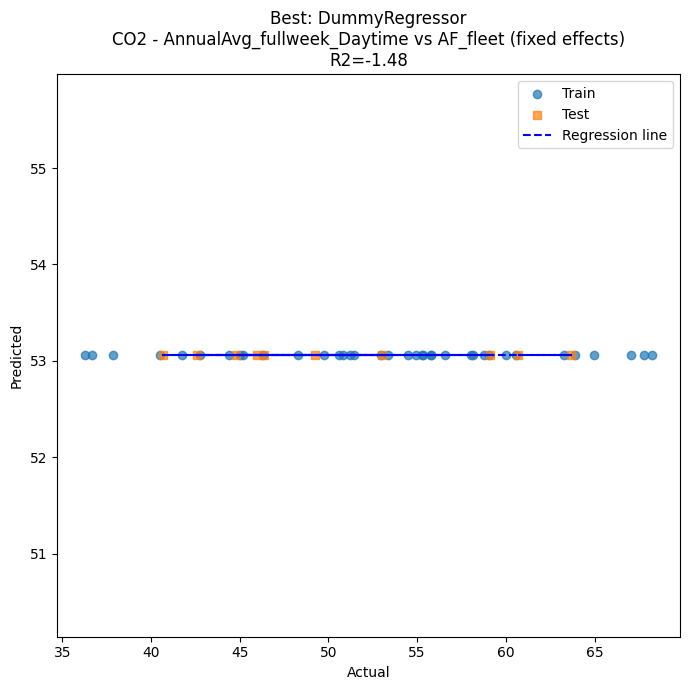

  0%|          | 0/42 [00:00<?, ?it/s]

NO2 - AnnualAvg_fullweek_Daytime vs AF_fleet: 46 valid rows
models shape: (41, 4)
models columns: Index(['Adjusted R-Squared', 'R-Squared', 'RMSE', 'Time Taken'], dtype='object')
                            Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                      
NuSVR                                    -1.25       0.00  5.82        0.02
PoissonRegressor                         -1.26      -0.00  5.83        0.03
LassoLarsCV                              -1.26      -0.00  5.83        0.02
LarsCV                                   -1.26      -0.00  5.83        0.02
TransformedTargetRegressor               -1.26      -0.00  5.83        0.02
Outlier indices in test set: Index([213, 109, 154, 209, 26, 64, 30], dtype='int64')
Actual values: 213   32.29
109   15.74
154   29.91
209   34.85
26    23.07
64    30.51
30    18.30
Name: AnnualAvg_fullweek_Daytime, dtype: float64
Predicted values: [23.53561083 24.01525015 25.04042437 26

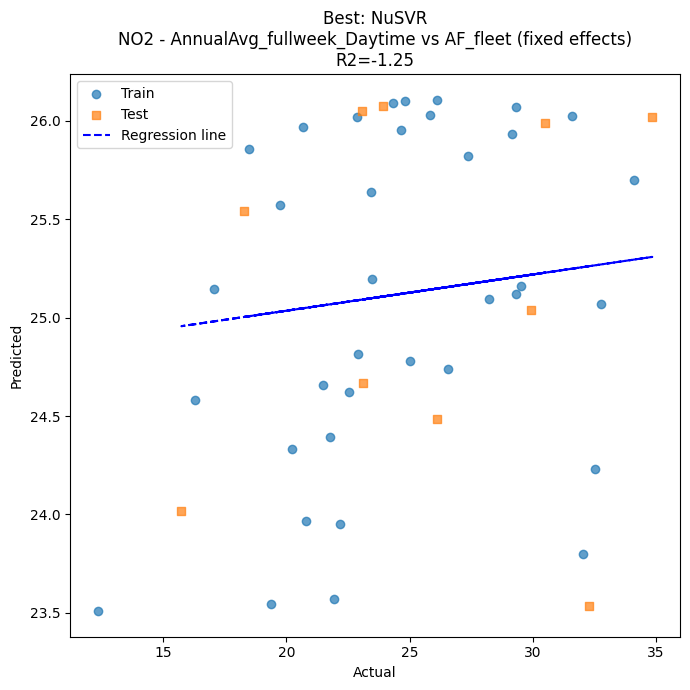

  0%|          | 0/42 [00:00<?, ?it/s]

PM2.5 - AnnualAvg_fullweek_Daytime vs AF_fleet: 33 valid rows
models shape: (41, 4)
models columns: Index(['Adjusted R-Squared', 'R-Squared', 'RMSE', 'Time Taken'], dtype='object')
                     Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                               
ExtraTreeRegressor                -2.83      -0.28 11.51        0.02
RANSACRegressor                   -3.52      -0.51 12.51        0.12
KNeighborsRegressor               -3.84      -0.61 12.94        0.03
SVR                               -4.20      -0.73 13.42        0.01
GammaRegressor                    -4.47      -0.82 13.77        0.02
Outlier indices in test set: Index([251, 131, 246, 182], dtype='int64')
Actual values: 251   42.99
131   27.23
246   62.48
182   43.12
Name: AnnualAvg_fullweek_Daytime, dtype: float64
Predicted values: [38.29972714 34.54313939 34.54313939 35.35002306]
Full test row(s):
     AF_fleet  Country_DK  Country_NL  Country_NO
251     26.43   

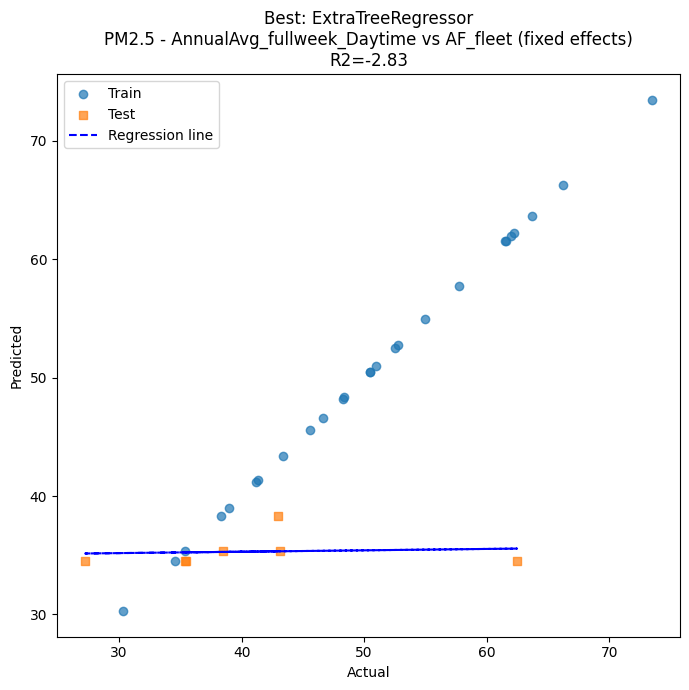

  0%|          | 0/42 [00:00<?, ?it/s]

PM10 - AnnualAvg_fullweek_Daytime vs AF_fleet: 48 valid rows
models shape: (41, 4)
models columns: Index(['Adjusted R-Squared', 'R-Squared', 'RMSE', 'Time Taken'], dtype='object')
                           Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                     
RANSACRegressor                         -1.25       0.00  3.97        0.04
QuantileRegressor                       -1.37      -0.05  4.07        0.04
SVR                                     -1.37      -0.06  4.08        0.02
LinearRegression                        -1.45      -0.09  4.14        0.01
OrthogonalMatchingPursuit               -1.45      -0.09  4.14        0.01
Outlier indices in test set: Index([125, 234, 124, 237, 231, 72, 117, 48, 123], dtype='int64')
Actual values: 125   11.75
234   14.88
124    7.90
237   11.57
231   14.93
72    10.55
117    3.43
48     2.91
123   12.37
Name: AnnualAvg_fullweek_Daytime, dtype: float64
Predicted values: [9.6148151

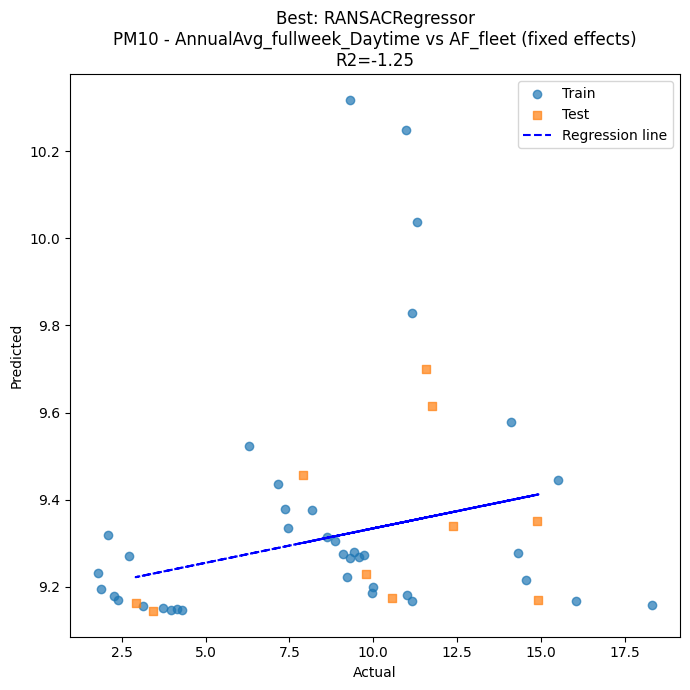

Saved all best model results to best_model_results_summary_allcountries.csv


In [57]:
import os
import sys
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from lazypredict.Supervised import LazyRegressor
from sklearn.model_selection import train_test_split
from contextlib import redirect_stdout, redirect_stderr
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression


# Set LightGBM and Python warnings to be quiet
os.environ["PYTHONWARNINGS"] = "ignore"
os.environ["LIGHTGBM_VERBOSE"] = "0"

class suppress_all_output:
    def __enter__(self):
        import os
        self.devnull = open(os.devnull, 'w')
        self.old_stdout = sys.stdout
        self.old_stderr = sys.stderr
        sys.stdout = self.devnull
        sys.stderr = self.devnull
        return self
    def __exit__(self, exc_type, exc_val, exc_tb):
        sys.stdout = self.old_stdout
        sys.stderr = self.old_stderr
        self.devnull.close()

# Load and prepare data
data = pd.read_csv("../data/processed/AQ_annual_averages.csv")
vehicle = pd.read_csv("../data/processed/combined_vehicle_data.csv")
data = data.merge(vehicle, on=['Country', 'Year'], how='left')

feature_cols = ['AF_fleet']
target_cols = [col for col in data.columns if "AnnualAvg_fullweek_Daytime" in col]

output_dir = "../results"
fig_dir = "../figures"
os.makedirs(fig_dir, exist_ok=True)
os.makedirs(output_dir, exist_ok=True)

results_list = []

warnings.filterwarnings("ignore")  # Hide warnings from sklearn and statsmodels

pollutants_to_run = ["CO2", "NO2", "PM2.5", "PM10"]

for pollutant in pollutants_to_run:
    df = data[data['Pollutant'] == pollutant].copy()
    if df.shape[0] < 6:
        print(f"Skipping {pollutant}: not enough rows ({df.shape[0]})")
        continue
    df = pd.get_dummies(df, columns=['Country'], drop_first=True)
    for target in target_cols:
        for feature in feature_cols:
            if feature not in df.columns or target not in df.columns:
                continue
            X = df[[feature] + [col for col in df.columns if col.startswith('Country_')]]
            y = df[target]
            mask = y.notnull() & X[feature].notnull()
            print(f"{pollutant} - {target} vs {feature}: {mask.sum()} valid rows")
            if mask.sum() < 6:
                continue
            try:
                X_train, X_test, y_train, y_test = train_test_split(X[mask], y[mask], test_size=0.2, random_state=42)
                with suppress_all_output(), redirect_stdout(sys.stderr), redirect_stderr(sys.stderr):
                    reg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)
                    # Remove unwanted models from results
                    exclude_models = ['GaussianProcessRegressor', 'MLPRegressor', 'KernelRidge']
                    models = models.drop(index=[m for m in models.index if m in exclude_models], errors='ignore')
                    models, predictions = reg.fit(X_train, X_test, y_train, y_test)
                print("models shape:", models.shape)
                print("models columns:", models.columns)
                print(models.head())
                r2_col = [col for col in models.columns if 'r2' in col.lower() or 'r-squared' in col.lower() or 'squared' in col.lower()]
                if not r2_col:
                    print("No R2 column found in models!")
                    continue
                if models.empty:
                    print("Models DataFrame is empty!")
                    continue
                best_idx = models[r2_col[0]].idxmax()
                best_model_name = best_idx  # since the index is the model name
                best_model = reg.models[best_model_name]
                y_pred = best_model.predict(X_test)

                # After y_pred = best_model.predict(X_test)
                outlier_mask = np.abs(y_pred - y_test) > (3 * np.std(y_pred))  # or pick a threshold
                print("Outlier indices in test set:", X_test.index[outlier_mask])
                print("Actual values:", y_test[outlier_mask])
                print("Predicted values:", y_pred[outlier_mask])
                print("Full test row(s):")
                print(X_test.loc[X_test.index[outlier_mask]])

                y_pred_all = best_model.predict(X[mask])
                plt.figure(figsize=(7, 7))
                # Predict for all data
                y_pred_all = best_model.predict(X[mask])

                # Plot train points
                train_mask = X[mask].index.isin(X_train.index)
                plt.scatter(y[mask][train_mask], y_pred_all[train_mask], alpha=0.7, label="Train", color="tab:blue", marker="o")
                # Plot test points
                test_mask = X[mask].index.isin(X_test.index)
                plt.scatter(y[mask][test_mask], y_pred_all[test_mask], alpha=0.7, label="Test", color="tab:orange", marker="s")

                # Regression line (fit only on test set for fair eval)
                z = np.polyfit(y_test, y_pred, 1)
                p = np.poly1d(z)
                plt.plot(y_test, p(y_test), "b--", label="Regression line")

                plt.xlabel("Actual")
                plt.ylabel("Predicted")
                plt.title(f"Best: {best_model_name}\n{pollutant} - {target} vs {feature} (fixed effects)\nR2={models.loc[best_idx][r2_col[0]]:.2f}")
                plt.legend()
                plt.tight_layout()
                fig_path = os.path.join(fig_dir, f"bestmodel_allcountries_{pollutant}_{target}_fe.png")
                if not os.path.exists(fig_path):
                    plt.savefig(fig_path)
                    print(f"Saved: {fig_path}")
                plt.show()
                plt.close()
                models['Pollutant'] = pollutant
                models['Target'] = target
                models['Feature'] = feature
                results_list.append(models.loc[[best_idx]])
            except Exception as e:
                print(f"Error for {pollutant} - {target} vs {feature}: {repr(e)}")
if results_list:
    all_results = pd.concat(results_list, ignore_index=True)
    all_results.to_csv(os.path.join(output_dir, "best_model_results_summary_allcountries.csv"), index=False)
    print("Saved all best model results to best_model_results_summary_allcountries.csv")
else:
    print("No valid model runs: check your data and thresholds!")